In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
%matplotlib inline
health = pd.read_csv('analytic_data2021.csv', header=1)
health_c = pd.read_csv('analytic_data2021.csv', header=1)

## EXPLORATORY DATA ANALYSIS & DATA CLEANING AND PREPARATION

In [2]:
health.head()

statecode  countycode  fipscode state          county  year  county_ranked  \
0          0           0         0    US   United States  2021            NaN   
1          1           0      1000    AL         Alabama  2021            NaN   
2          1           1      1001    AL  Autauga County  2021            1.0   
3          1           3      1003    AL  Baldwin County  2021            1.0   
4          1           5      1005    AL  Barbour County  2021            1.0   

   v001_rawvalue  v001_numerator  v001_denominator  ...  v057_rawvalue  \
0    6906.641094       3854074.0       915437195.0  ...       0.507502   
1    9819.887431         82249.0        13651801.0  ...       0.516739   
2    7830.053484           787.0          155765.0  ...       0.515080   
3    7680.477270          3147.0          600539.0  ...       0.515096   
4   11476.629416           515.0           69011.0  ...       0.470793   

   v057_numerator  v057_denominator  v057_cilow  v057_cihigh  v058_rawvalue  \
0       166582199         328239523         NaN          NaN       0.192690   
1         2533668           4903185         NaN          NaN       0.409632   
2           28777             55869         NaN          NaN       0.420022   
3          114987            223234         NaN          NaN       0.422791   
4           11622             24686         NaN          NaN       0.677896   

   v058_numerator  v058_denominator  v058_cilow  v058_cihigh  
0             NaN               NaN         NaN          NaN  
1       1957932.0         4779736.0         NaN          NaN  
2         22921.0           54571.0         NaN          NaN  
3         77060.0          182265.0         NaN          NaN  
4         18613.0           27457.0         NaN          NaN  

[5 rows x 690 columns]

In [3]:
health.describe()

statecode   countycode      fipscode    year  county_ranked  \
count  3194.000000  3194.000000   3194.000000  3194.0    3142.000000   
mean     30.249530   101.886662  30351.417032  2021.0       0.980586   
std      15.160981   107.624838  15179.045587     0.0       0.137998   
min       0.000000     0.000000      0.000000  2021.0       0.000000   
25%      18.000000    33.000000  18171.500000  2021.0       1.000000   
50%      29.000000    77.000000  29174.000000  2021.0       1.000000   
75%      45.000000   133.000000  45074.500000  2021.0       1.000000   
max      56.000000   840.000000  56045.000000  2021.0       1.000000   

       v001_rawvalue  v001_numerator  v001_denominator    v001_cilow  \
count    3133.000000    3.133000e+03      3.133000e+03   3133.000000   
mean     8479.363177    3.690250e+03      8.765205e+05   6989.593011   
std      2699.587026    7.017419e+04      1.672760e+07   2366.207230   
min      1625.721002    2.000000e+01      2.853000e+03    909.903704   
25%      6609.248910    1.900000e+02      3.255600e+04   5370.147392   
50%      8186.221029    4.360000e+02      7.519800e+04   6799.078022   
75%      9980.961200    1.091000e+03      2.104000e+05   8392.217977   
max     34538.518580    3.854074e+06      9.154372e+08  21973.566476   

        v001_cihigh  ...  v057_rawvalue  v057_numerator  v057_denominator  \
count   3133.000000  ...    3194.000000    3.194000e+03      3.194000e+03   
mean   10144.281121  ...       0.498958    1.564642e+05      3.083026e+05   
std     3563.770221  ...       0.022501    3.014122e+06      5.939529e+06   
min     2681.379560  ...       0.265138    4.500000e+01      8.600000e+01   
25%     7775.250979  ...       0.494175    5.494250e+03      1.112875e+04   
50%     9659.986263  ...       0.502965    1.325900e+04      2.653750e+04   
75%    11848.962768  ...       0.510309    3.671800e+04      7.334800e+04   
max    56088.390330  ...       0.570082    1.665822e+08      3.282395e+08   

       v057_cilow  v057_cihigh  v058_rawvalue  v058_numerator  \
count         0.0          0.0    3187.000000    3.186000e+03   
mean          NaN          NaN       0.580467    3.733560e+04   
std           NaN          NaN       0.315553    1.839409e+05   
min           NaN          NaN       0.000000    0.000000e+00   
25%           NaN          NaN       0.325275    7.144000e+03   
50%           NaN          NaN       0.588250    1.470750e+04   
75%           NaN          NaN       0.861214    2.623375e+04   
max           NaN          NaN       1.000000    3.847522e+06   

       v058_denominator  v058_cilow  v058_cihigh  
count      3.186000e+03         0.0          0.0  
mean       1.938007e+05         NaN          NaN  
std        1.177460e+06         NaN          NaN  
min        8.200000e+01         NaN          NaN  
25%        1.138800e+04         NaN          NaN  
50%        2.653450e+04         NaN          NaN  
75%        7.151150e+04         NaN          NaN  
max        3.725396e+07         NaN          NaN  

[8 rows x 688 columns]

In [4]:
#Removing all the rows where the county_ranked column has null values as state and national level data does 
#not have any values for this column. 

health = health[~health['county_ranked'].isnull()]
health_c = health_c[~health_c['county_ranked'].isnull()]
len(health)

3142

In [5]:
#REGRESSION DATAFRAME - INPUT

#Keeping only those columns that have rawvalue in their name along with the fipscode
health = health.loc[:,health.columns.str.contains('rawvalue$|FIPS', case=False)]   
health.head()

fipscode  v001_rawvalue  v002_rawvalue  v036_rawvalue  v042_rawvalue  \
2      1001    7830.053484       0.198392       4.501499       4.850214   
3      1003    7680.477270       0.164607       3.647978       4.768294   
4      1005   11476.629416       0.298415       5.569267       5.590494   
5      1007   12172.562382       0.238533       4.894377       5.271114   
6      1009   11096.050649       0.219856       4.986622       5.357809   

   v037_rawvalue  v009_rawvalue  v011_rawvalue  v133_rawvalue  v070_rawvalue  \
2       0.092018       0.198108          0.330            6.7          0.306   
3       0.082920       0.185133          0.300            7.8          0.247   
4       0.113553       0.255308          0.412            5.5          0.280   
5       0.102210       0.230848          0.374            7.6          0.334   
6       0.074305       0.229550          0.330            7.9          0.333   

   ...  v053_rawvalue  v054_rawvalue  v055_rawvalue  v081_rawvalue  \
2  ...       0.159731       0.198643       0.004761       0.011742   
3  ...       0.209780       0.086076       0.007803       0.010661   
4  ...       0.196913       0.478287       0.006886       0.004699   
5  ...       0.166696       0.210726       0.004599       0.002143   
6  ...       0.187009       0.015080       0.006399       0.003199   

   v080_rawvalue  v056_rawvalue  v126_rawvalue  v059_rawvalue  v057_rawvalue  \
2       0.001038       0.029909       0.737708       0.008033       0.515080   
3       0.000690       0.047188       0.832073       0.007085       0.515096   
4       0.002106       0.045248       0.455116       0.018907       0.470793   
5       0.001161       0.027820       0.744083       0.003353       0.467313   
6       0.001159       0.096531       0.867707       0.016185       0.507626   

   v058_rawvalue  
2       0.420022  
3       0.422791  
4       0.677896  
5       0.683526  
6       0.899515  

[5 rows x 80 columns]

In [6]:
#REGRESSION DATAFRAME

#Removing all the demographic variables from the main dataframe along with the additional measures

health.drop(health.iloc[:,36:], inplace=True, axis=1)
health.head()

fipscode  v001_rawvalue  v002_rawvalue  v036_rawvalue  v042_rawvalue  \
2      1001    7830.053484       0.198392       4.501499       4.850214   
3      1003    7680.477270       0.164607       3.647978       4.768294   
4      1005   11476.629416       0.298415       5.569267       5.590494   
5      1007   12172.562382       0.238533       4.894377       5.271114   
6      1009   11096.050649       0.219856       4.986622       5.357809   

   v037_rawvalue  v009_rawvalue  v011_rawvalue  v133_rawvalue  v070_rawvalue  \
2       0.092018       0.198108          0.330            6.7          0.306   
3       0.082920       0.185133          0.300            7.8          0.247   
4       0.113553       0.255308          0.412            5.5          0.280   
5       0.102210       0.230848          0.374            7.6          0.334   
6       0.074305       0.229550          0.330            7.9          0.333   

   ...  v044_rawvalue  v082_rawvalue  v140_rawvalue  v043_rawvalue  \
2  ...       5.090408       0.247406      12.229996     272.282220   
3  ...       4.385135       0.223723      10.503527     203.660396   
4  ...       5.981993       0.510081       7.636349     414.277861   
5  ...       5.002608       0.306149       8.482143      89.349126   
6  ...       4.427838       0.224574       7.780083     482.690611   

   v135_rawvalue  v125_rawvalue  v124_rawvalue  v136_rawvalue  v067_rawvalue  \
2      68.410043           10.4            0.0       0.136310       0.857885   
3      72.878641            7.2            0.0       0.129967       0.837601   
4      76.988947            9.4            0.0       0.137106       0.821164   
5     105.601306           10.0            0.0       0.092552       0.870577   
6     107.591609           10.6            0.0       0.101257       0.875196   

   v137_rawvalue  
2          0.383  
3          0.404  
4          0.309  
5          0.520  
6          0.579  

[5 rows x 36 columns]

In [7]:
profile = health.profile_report(title="Report")
profile.to_file(output_file="Report.html")

From the profile report generated on the health dataframe, we can see that some of the columns have missing values.

We will be replacing these missing values with the mode of the particular column. 

In [8]:
#REGRESSION - replacing these missing values with the mode of the particular column.

null_columns = health.columns[health.isnull().any()].tolist()
null_index= health.columns.get_indexer(null_columns)

for i in null_index:
    mode_value = health.iloc[:,i].mode()[0]
    health.iloc[:,i].fillna(mode_value, inplace=True)

<ipython-input-9-1edc79487e19>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1,1)


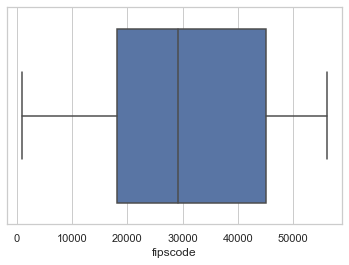

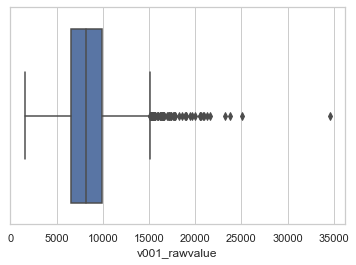

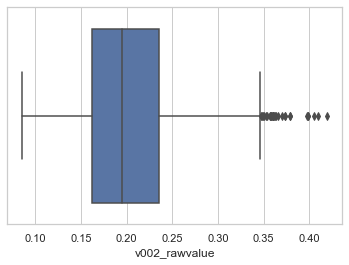

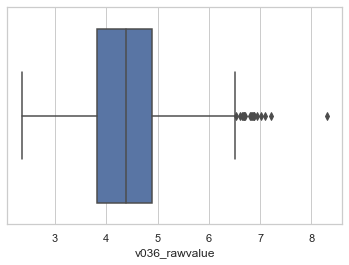

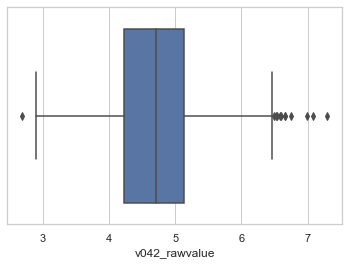

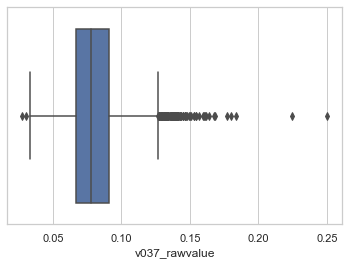

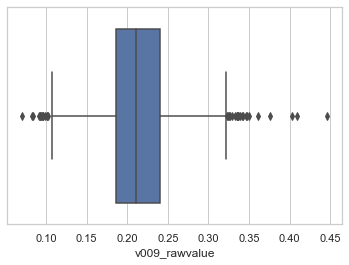

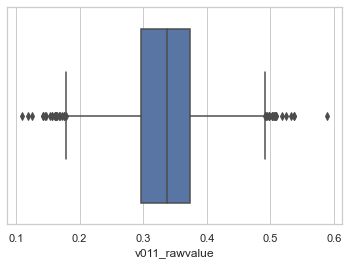

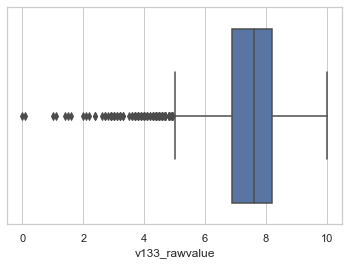

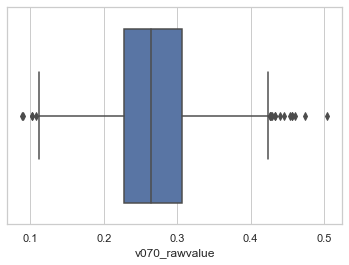

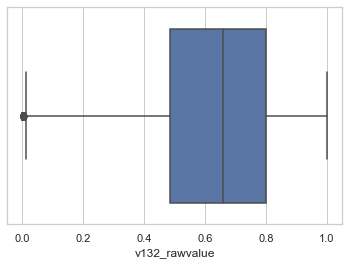

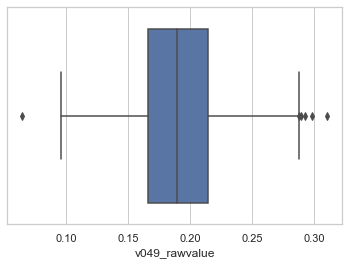

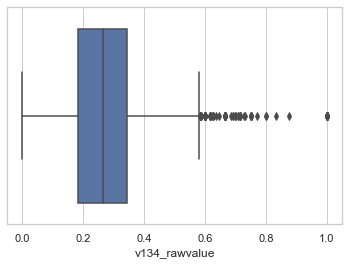

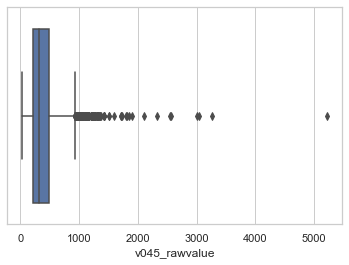

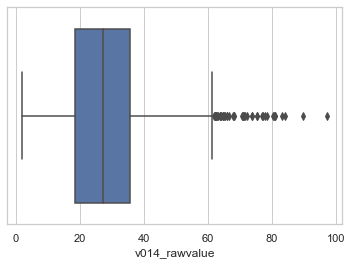

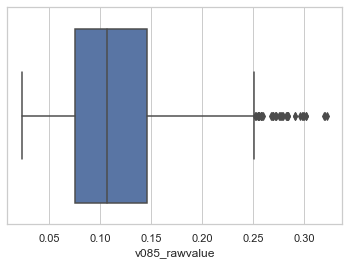

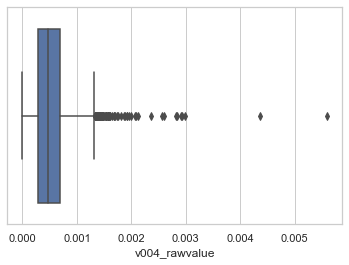

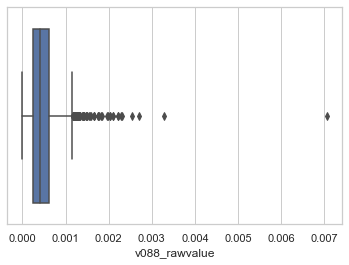

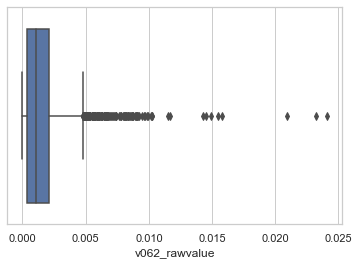

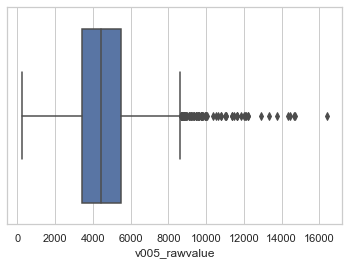

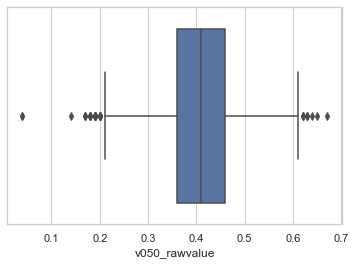

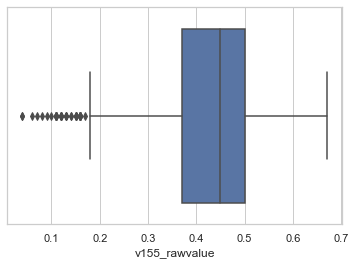

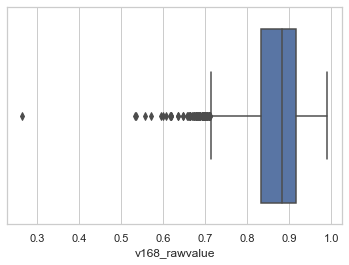

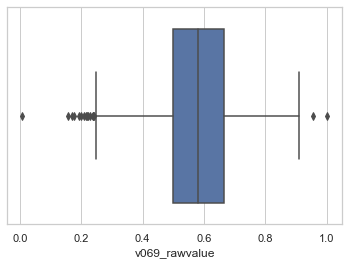

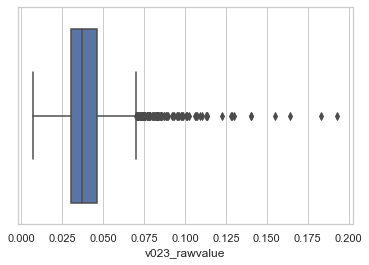

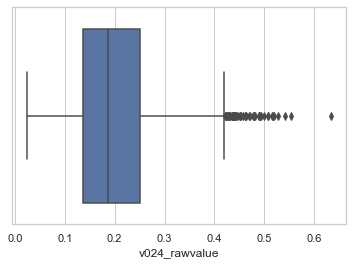

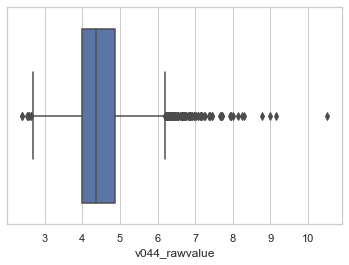

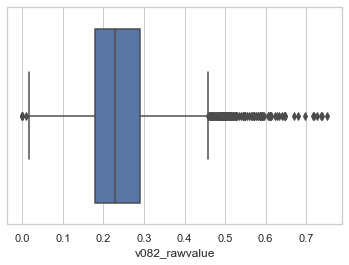

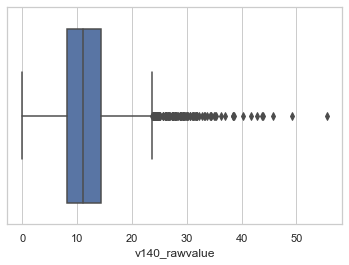

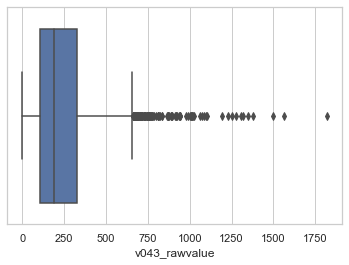

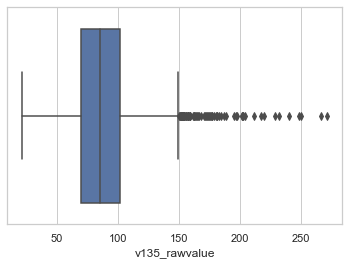

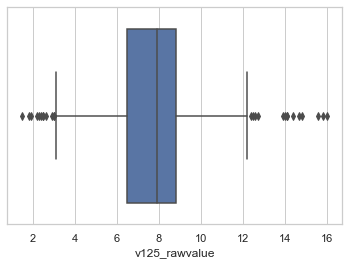

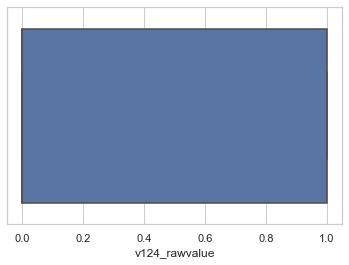

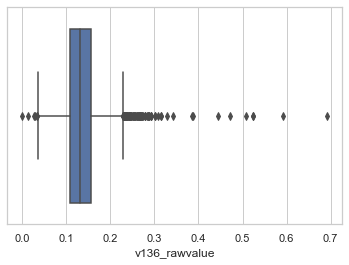

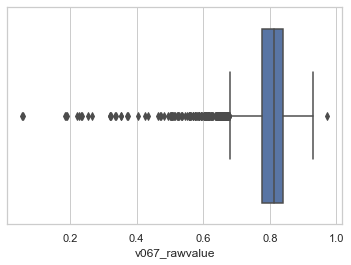

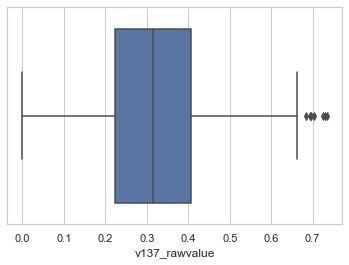

In [9]:
#Plotting boxplots for all the features to check if there exists outliers

for i in health.columns:
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1,1)
    ax=sns.boxplot(x=health[i])

As evident from the boxplots generated, we can see that most the features have outliers. 
We will be using the +- 1.5IQR method to find outliers and then replace those values with the median

In [10]:
#Replacing all the outliers in all the columns with the median value

for i in health.columns[6:]:
    if(i=='fipscode')or (i=='v124_rawvalue'):
        continue
    data=health[i]
    median_v = np.median(data)
    #print(median_v)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print(lwr_bound, upr_bound)
    data = np.where(data<=lwr_bound, median_v, data)
    data = np.where(data>=upr_bound, median_v, data)
    health[i]=data
    
no_scale = health.copy()

In [11]:
#Scaling all the features of the dataset with minmax scaler 
#All the features will now have values between [0,1]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled=scaler.fit_transform(health.iloc[:,1:].to_numpy())
health.iloc[:,1:]=scaled


<ipython-input-12-eeb4d690278e>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1,1)


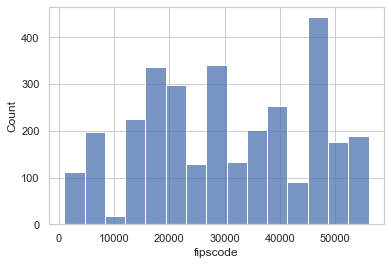

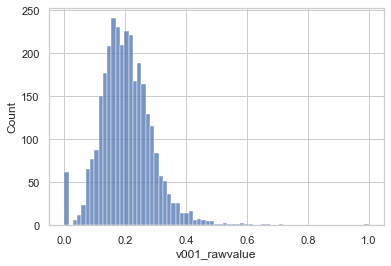

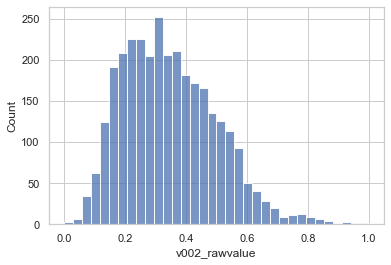

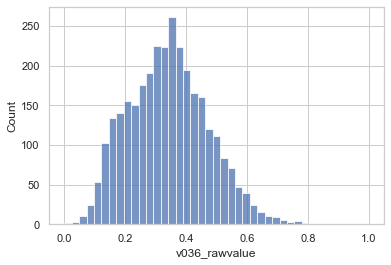

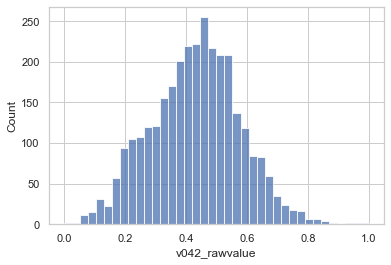

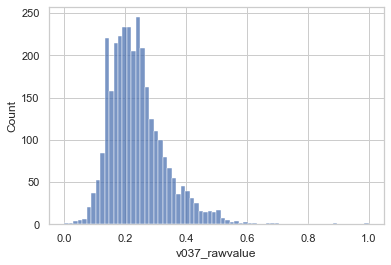

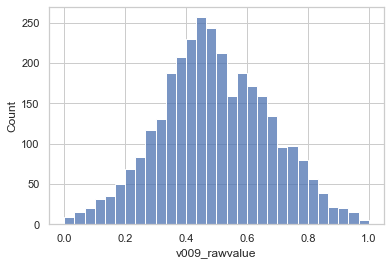

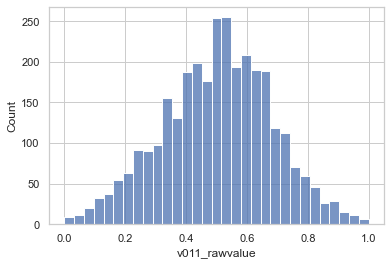

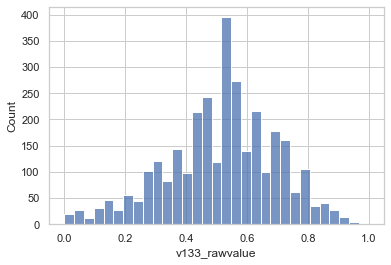

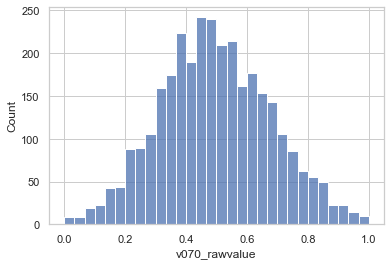

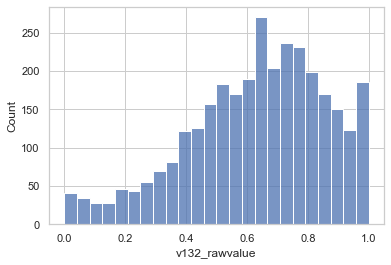

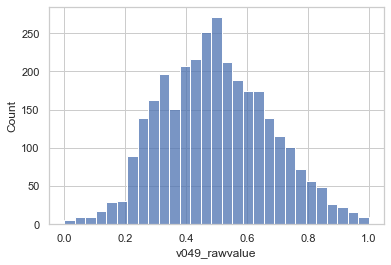

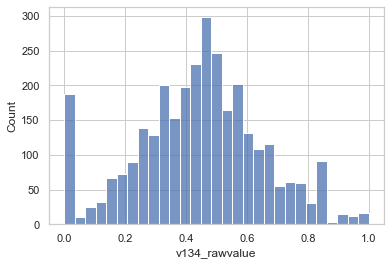

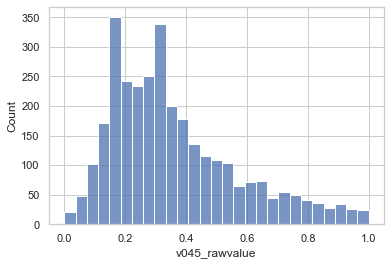

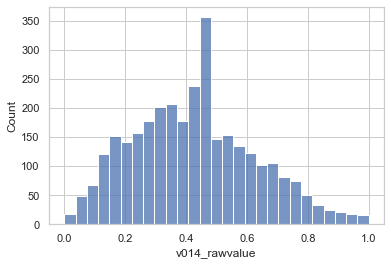

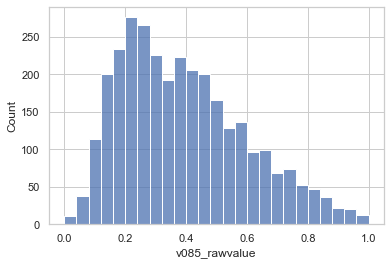

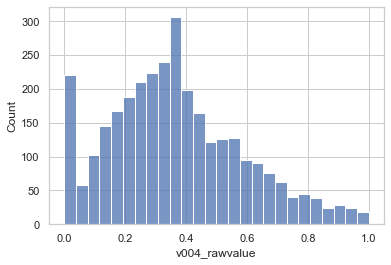

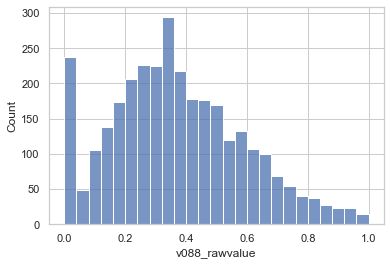

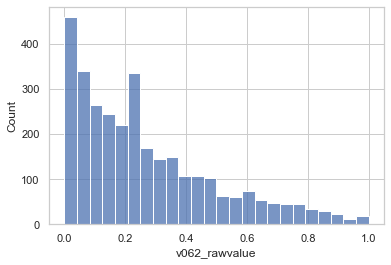

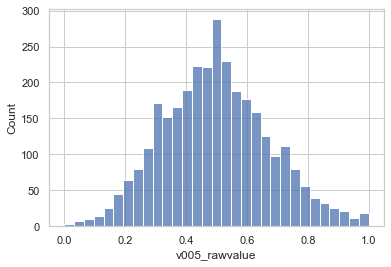

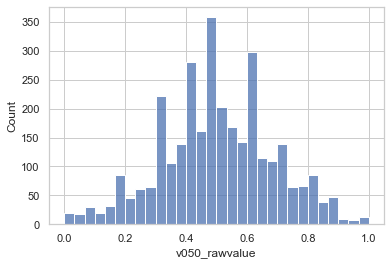

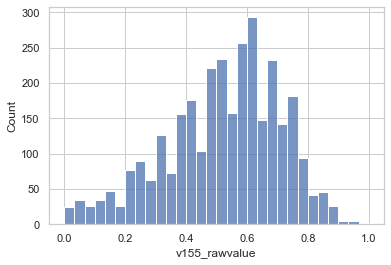

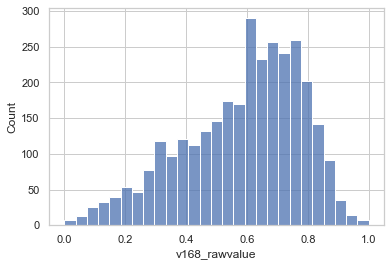

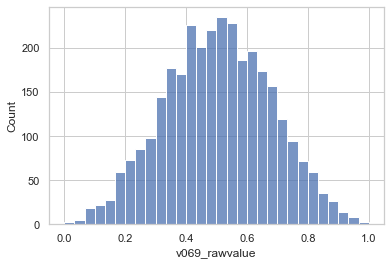

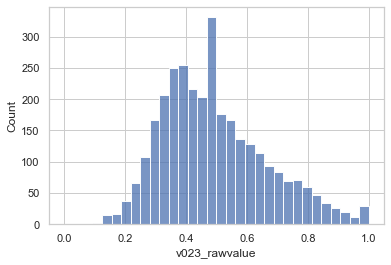

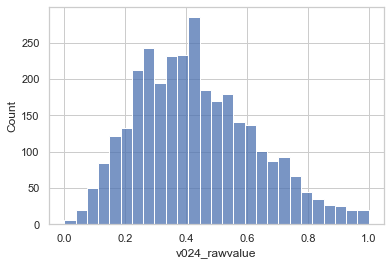

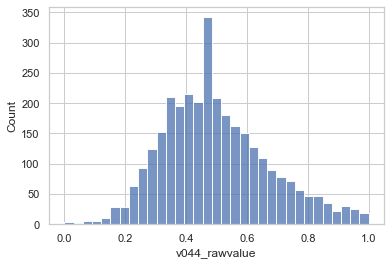

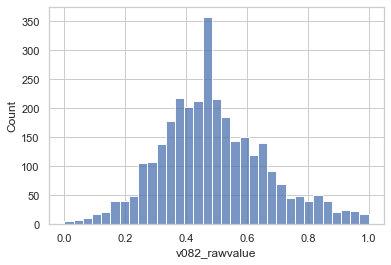

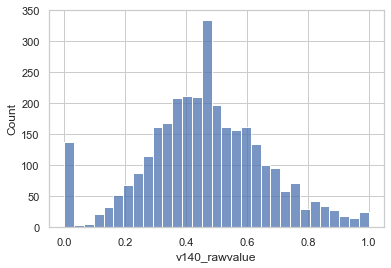

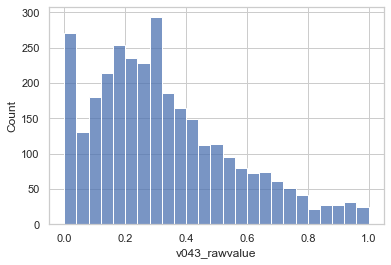

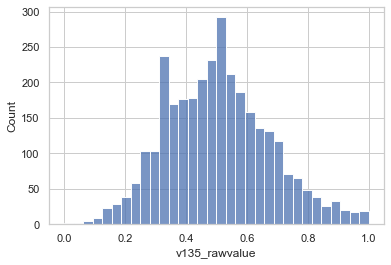

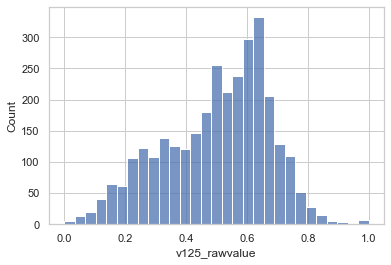

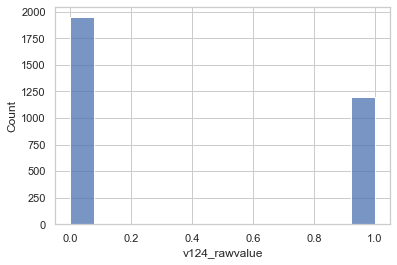

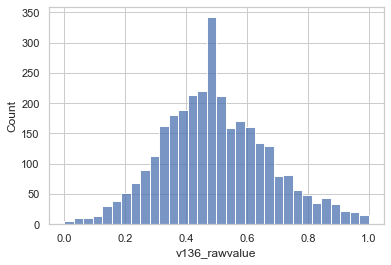

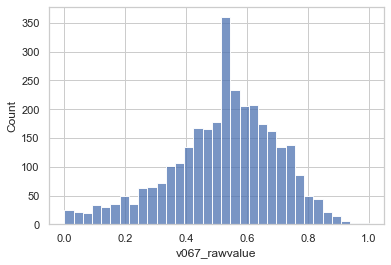

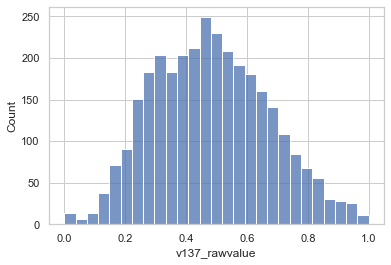

In [12]:
#Plotting histograms for all the features to take a look at the distributions of the features after scaling

for i in health.columns:
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1,1)
    ax=sns.histplot(x=health[i])

<ipython-input-13-519e2054b7d1>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1,1)


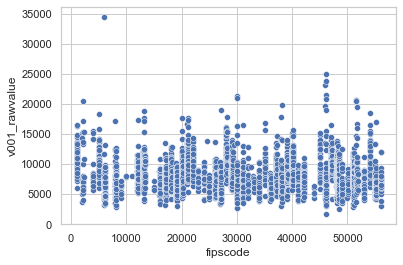

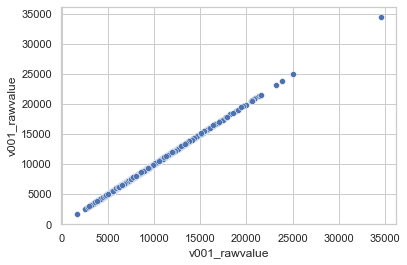

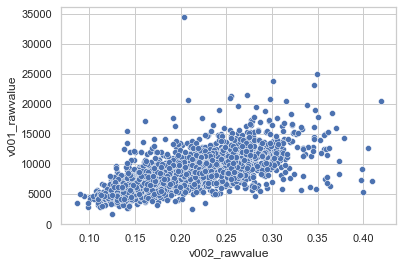

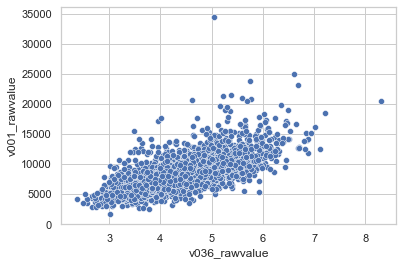

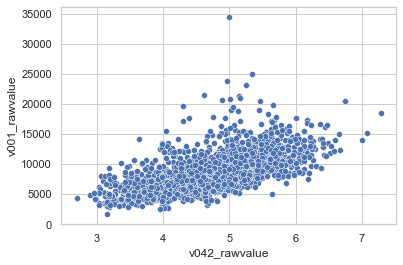

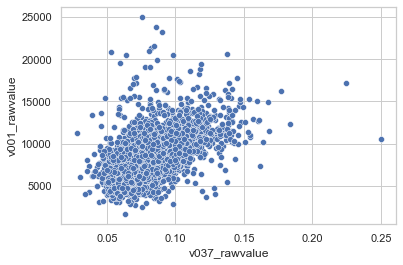

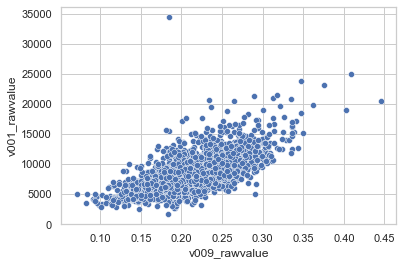

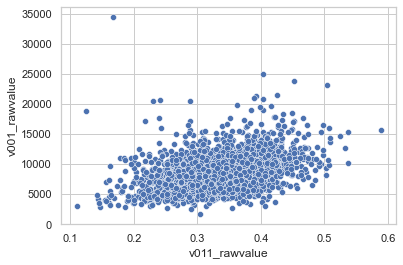

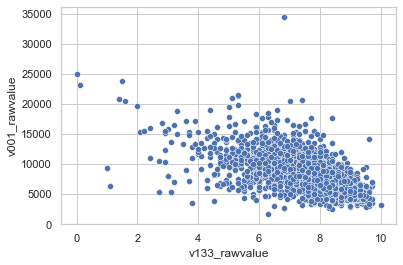

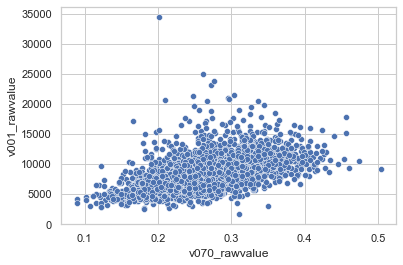

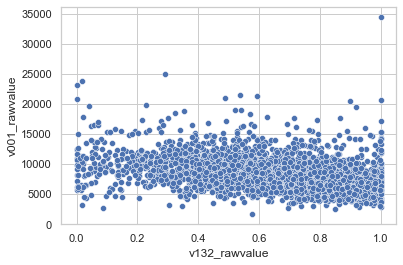

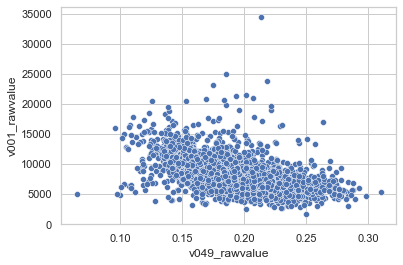

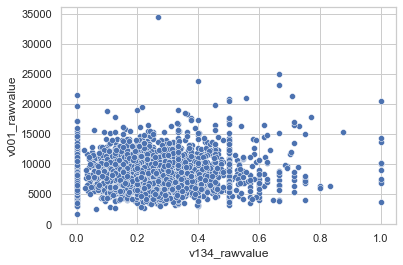

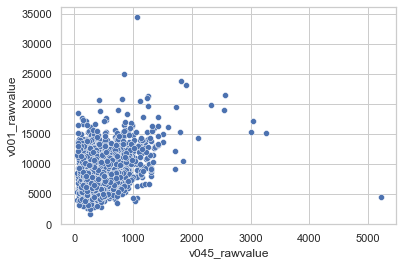

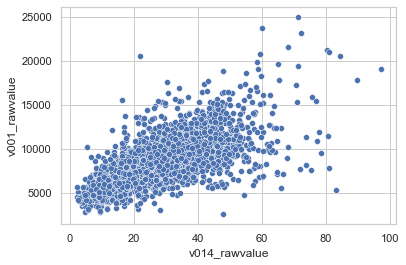

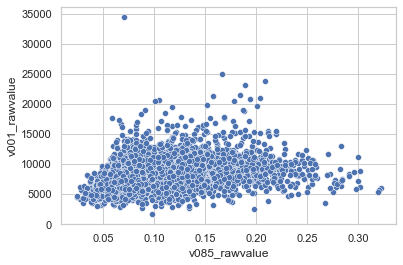

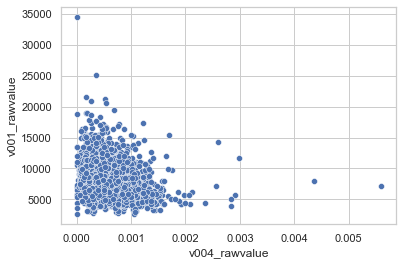

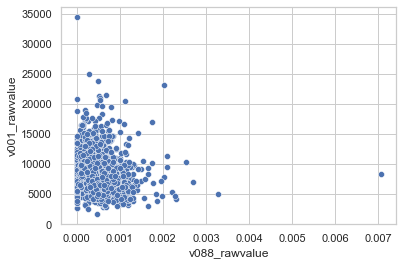

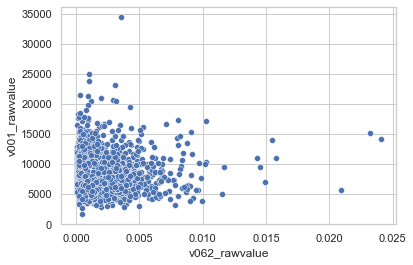

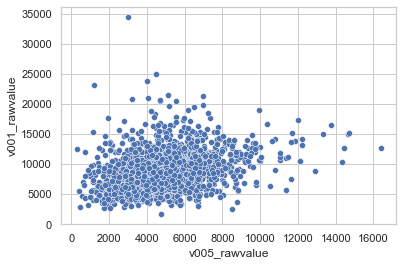

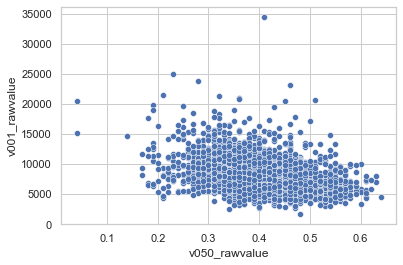

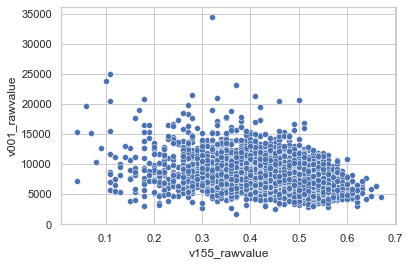

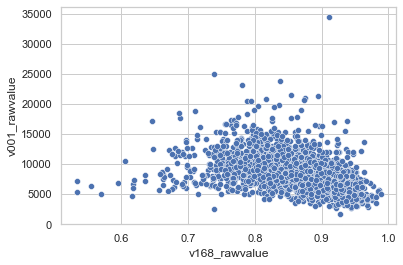

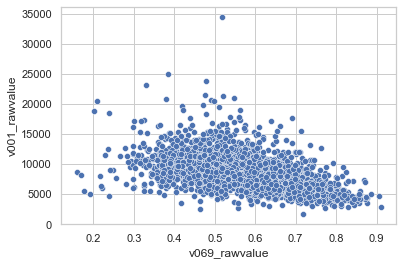

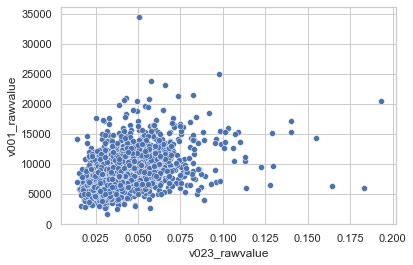

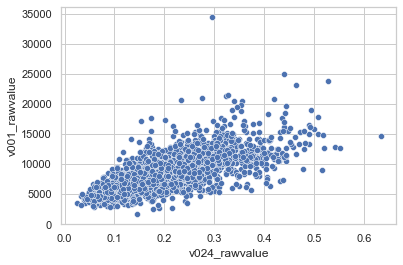

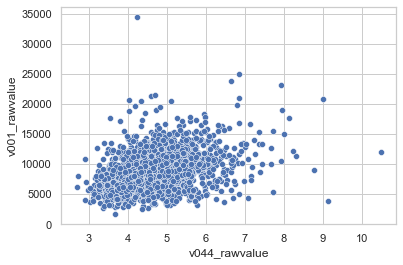

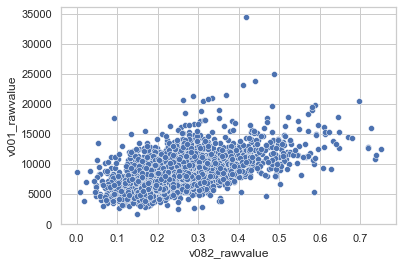

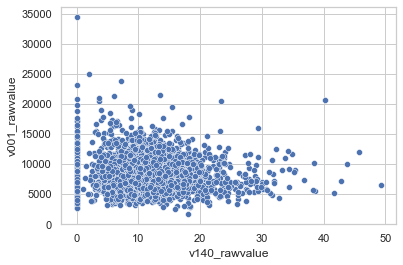

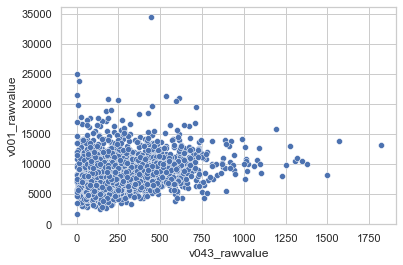

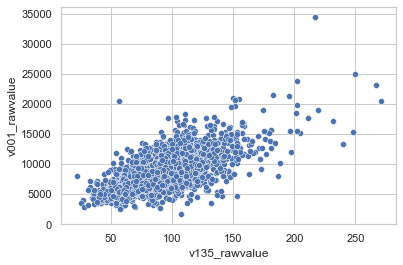

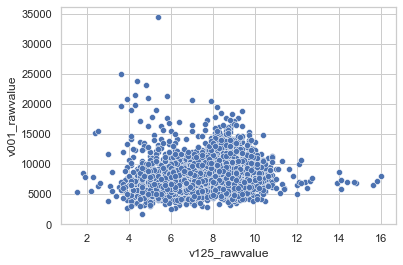

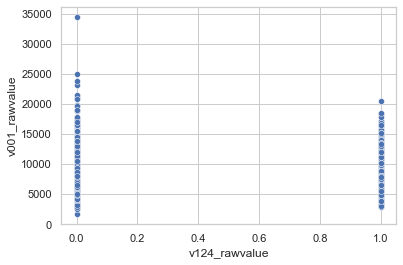

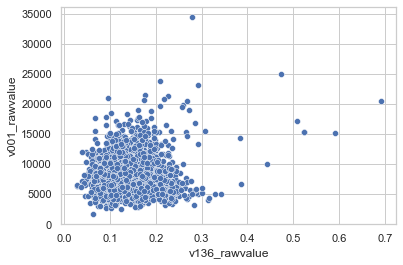

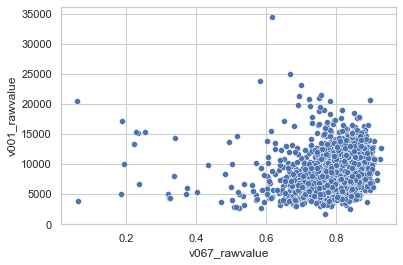

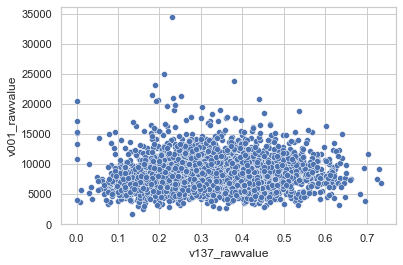

In [13]:
#Plotting a graph of all the features with respect to premature death, to estimate the important factors

for i in health.columns:
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1,1)
    ax=sns.scatterplot(data=health_c, x=i, y=health.columns[1])

We can see that there seems to be a linear relationship between Premature death and Adult Smoking, Teen Births, Children in Poverty, Children in single parent household, Injury deaths.

<AxesSubplot:>

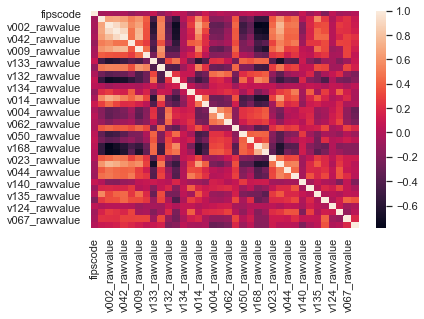

In [14]:
import seaborn as sns
sns.heatmap(health.corr())

1) What steps did you use for exploratory data analysis and subsequent data preparation on this data set? 
This should address summary statistics and handling of missing data and outliers (5 points)


Data Cleaning and Preparation- 
- 'County_Ranked' column - Removed all the row from the dataframe where the 'County_Ranked' column had a missing value. The variable is set to missing for state and national level data, as they aren't eligible to be ranked. 
- Removed columns with redundant information such as statecode, countycode, state, county, year and county_ranked. The row identifier is now 'fipscode'. Removed all the columns without rawvalue in their name.
- Created a new dataframe called 'target' to store all the columns containing outcome variable. From the main dataframe of predictivev features, removed all the columns apart from Ranked Measures. Generated a Profile Report to analyse all the remainning columns.
- From the profile report, it was evident that most columns had missing values and outliers. 
- Replaced all the missing values with the mode of the respective columns. 
- Generated boxplots for all the predictive features. Used the +- 1.5IQR method to find outliers and then replace those values with the median of the respective columns. 
- Scaled all the columns with the minmax scaler to standardise the columns

Exploratory Data Analysis - 
- Used the describe function to get a good idea of the summary statistics of the features. 
- Ran a profile report to get an idea of the correlation between features and information about missing values and outliers. 
- Plotted boxplots for all the features to get a better understanding of the spread of data and outliers. 
- Plotted a correlation maxtrix to check for obvious correlations between features. 
- Plotted histograms to understand frequency distribution of all the features

From our EDA, we can see that some features have a better correlation with the predictive health outcomes as compared to the others. 
Features like Adult smoking, excessive drinking, Children in poverty have a stronger correlation with the predictive health measures like premature death, poor physical health days 
Features like Social Associations, Drinking water violations, mental health providers don't have a very strong correlation with the predictive health measures. 


Choice of Modelling Techniques -
- For the supervised learning models, it is clear that since all the input variables are continuous real-valued features, the best technique to find a relationship between the input and output variables is to build a regressor model (linear, ridge, lasso, etc)
- For the unsupervised model of clustering, we will use a simple k-means method to form clusters on the basis of the entire dataset

## CLUSTERING 

In [15]:
#CLUSTERING DATAFRAME - Data Cleaning and Data Preparation

health_c = health_c.loc[:,health_c.columns.str.contains('rawvalue$|FIPS', case=False)]   
health_c.drop(health_c.iloc[:,36:], inplace=True, axis=1)
health_c.head()

fipscode  v001_rawvalue  v002_rawvalue  v036_rawvalue  v042_rawvalue  \
2      1001    7830.053484       0.198392       4.501499       4.850214   
3      1003    7680.477270       0.164607       3.647978       4.768294   
4      1005   11476.629416       0.298415       5.569267       5.590494   
5      1007   12172.562382       0.238533       4.894377       5.271114   
6      1009   11096.050649       0.219856       4.986622       5.357809   

   v037_rawvalue  v009_rawvalue  v011_rawvalue  v133_rawvalue  v070_rawvalue  \
2       0.092018       0.198108          0.330            6.7          0.306   
3       0.082920       0.185133          0.300            7.8          0.247   
4       0.113553       0.255308          0.412            5.5          0.280   
5       0.102210       0.230848          0.374            7.6          0.334   
6       0.074305       0.229550          0.330            7.9          0.333   

   ...  v044_rawvalue  v082_rawvalue  v140_rawvalue  v043_rawvalue  \
2  ...       5.090408       0.247406      12.229996     272.282220   
3  ...       4.385135       0.223723      10.503527     203.660396   
4  ...       5.981993       0.510081       7.636349     414.277861   
5  ...       5.002608       0.306149       8.482143      89.349126   
6  ...       4.427838       0.224574       7.780083     482.690611   

   v135_rawvalue  v125_rawvalue  v124_rawvalue  v136_rawvalue  v067_rawvalue  \
2      68.410043           10.4            0.0       0.136310       0.857885   
3      72.878641            7.2            0.0       0.129967       0.837601   
4      76.988947            9.4            0.0       0.137106       0.821164   
5     105.601306           10.0            0.0       0.092552       0.870577   
6     107.591609           10.6            0.0       0.101257       0.875196   

   v137_rawvalue  
2          0.383  
3          0.404  
4          0.309  
5          0.520  
6          0.579  

[5 rows x 36 columns]

In [16]:
#CLUSTERING - replacing these missing values with the mode of the particular column.

null_columns = health_c.columns[health_c.isnull().any()].tolist()
null_index= health_c.columns.get_indexer(null_columns)

for i in null_index:
    mode_value = health_c.iloc[:,i].mode()[0]
    health_c.iloc[:,i].fillna(mode_value, inplace=True)

In [17]:
#CLUSTERING - Replacing all the outliers in all the columns with the median value EXCEPT FOR TARGET VARIABLES

#print(health_c.head())

for i in health_c.columns[6:]:
    if(i=='fipscode')or (i=='v124_rawvalue'):
        continue
    data=health_c[i]
    median_v = np.median(data)
    #print(median_v)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print(lwr_bound, upr_bound)
    data = np.where(data<=lwr_bound, median_v, data)
    data = np.where(data>=upr_bound, median_v, data)
    health_c[i]=data
    
df_base=health_c.copy()

<AxesSubplot:>

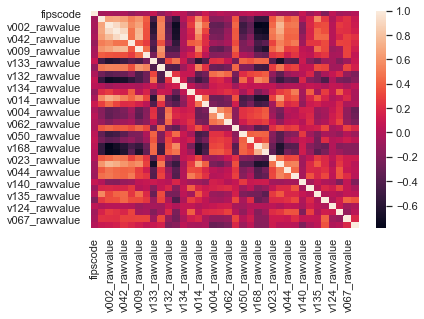

In [18]:
sns.heatmap(health_c.corr())

In [19]:
#CLUSTERING - Scaling all the features of the dataset with minmax scaler 
#All the features will now have values between [0,1]

scaler = MinMaxScaler()
scaled=scaler.fit_transform(health_c.iloc[:,1:].to_numpy())
health_c.iloc[:,1:]=scaled


Text(0.5, 1.0, 'Elbow curve')

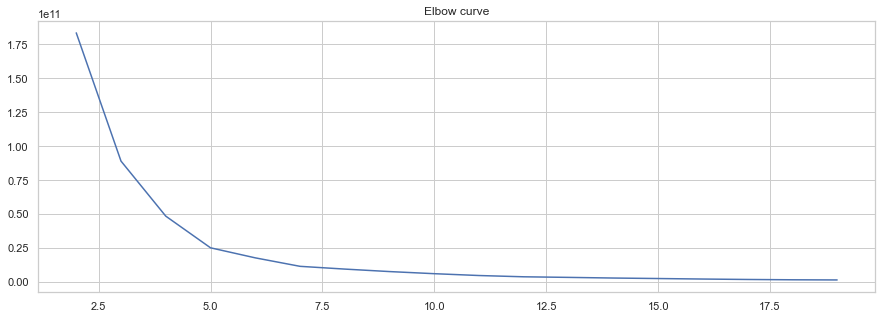

In [20]:
#CLUSTERING - Using the elbow method to determine the number of clusters

from sklearn.cluster import KMeans

health_c.drop(labels='v124_rawvalue', axis=1)
health_c.drop(labels='fipscode', axis=1)

X = health_c
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

As we can see from the graph, the number of clusters can be fixed at 5 

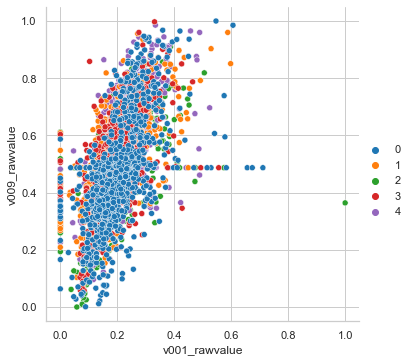

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(health_c)
y_kmeans=kmeans.labels_

sns.relplot(data=health_c, x='v001_rawvalue', y='v009_rawvalue', hue=y_kmeans,  palette='tab10', kind='scatter')


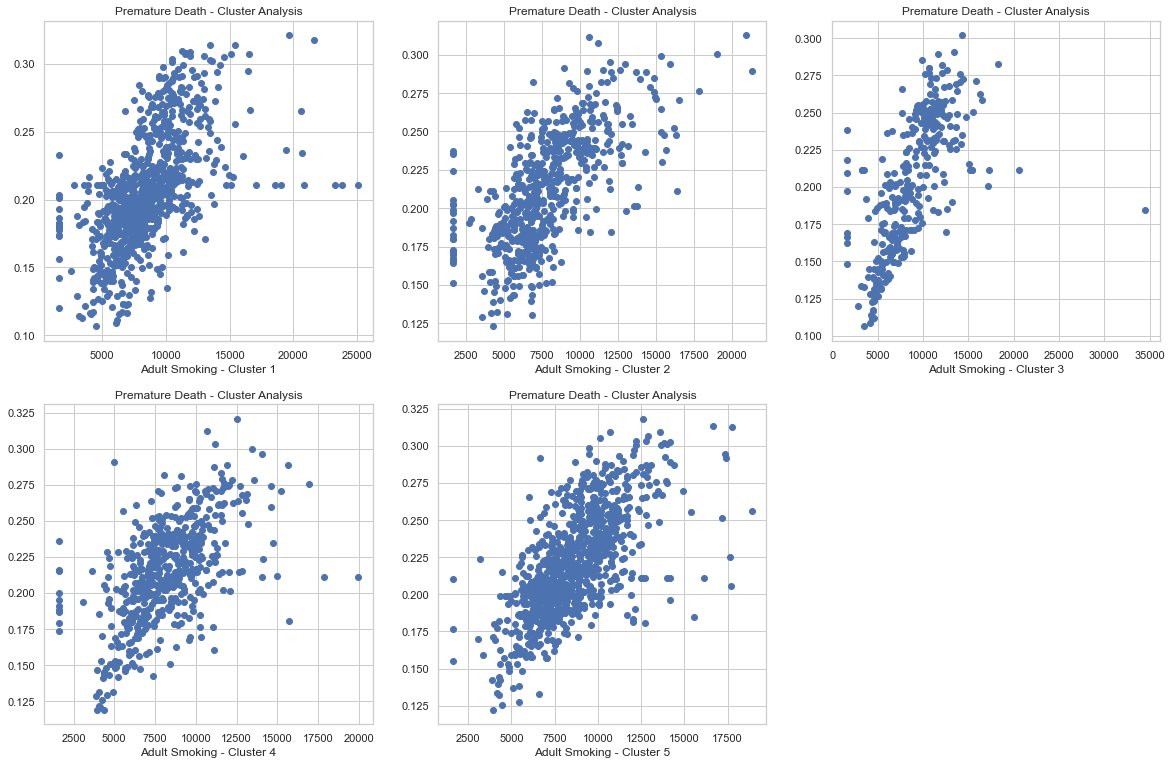

In [22]:
#Plotting the values of Premature death with Adult Smoking for all the different clusters


plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.scatter(no_scale[y_kmeans==0]['v001_rawvalue'],no_scale[y_kmeans==0]['v009_rawvalue'])
plt.title('Premature Death - Cluster Analysis')
plt.xlabel('Adult Smoking - Cluster 1')
plt.subplot(3,3,2)
plt.scatter(no_scale[y_kmeans==1]['v001_rawvalue'],no_scale[y_kmeans==1]['v009_rawvalue'])
plt.title('Premature Death - Cluster Analysis')
plt.xlabel('Adult Smoking - Cluster 2')
plt.subplot(3,3,3)
plt.scatter(no_scale[y_kmeans==2]['v001_rawvalue'],no_scale[y_kmeans==2]['v009_rawvalue'])
plt.title('Premature Death - Cluster Analysis')
plt.xlabel('Adult Smoking - Cluster 3')
plt.subplot(3,3,4)
plt.scatter(no_scale[y_kmeans==3]['v001_rawvalue'],no_scale[y_kmeans==3]['v009_rawvalue'])
plt.title('Premature Death - Cluster Analysis')
plt.xlabel('Adult Smoking - Cluster 4')
plt.subplot(3,3,5)
plt.scatter(no_scale[y_kmeans==4]['v001_rawvalue'],no_scale[y_kmeans==4]['v009_rawvalue'])
plt.title('Premature Death - Cluster Analysis')
plt.xlabel('Adult Smoking - Cluster 5')
plt.show()

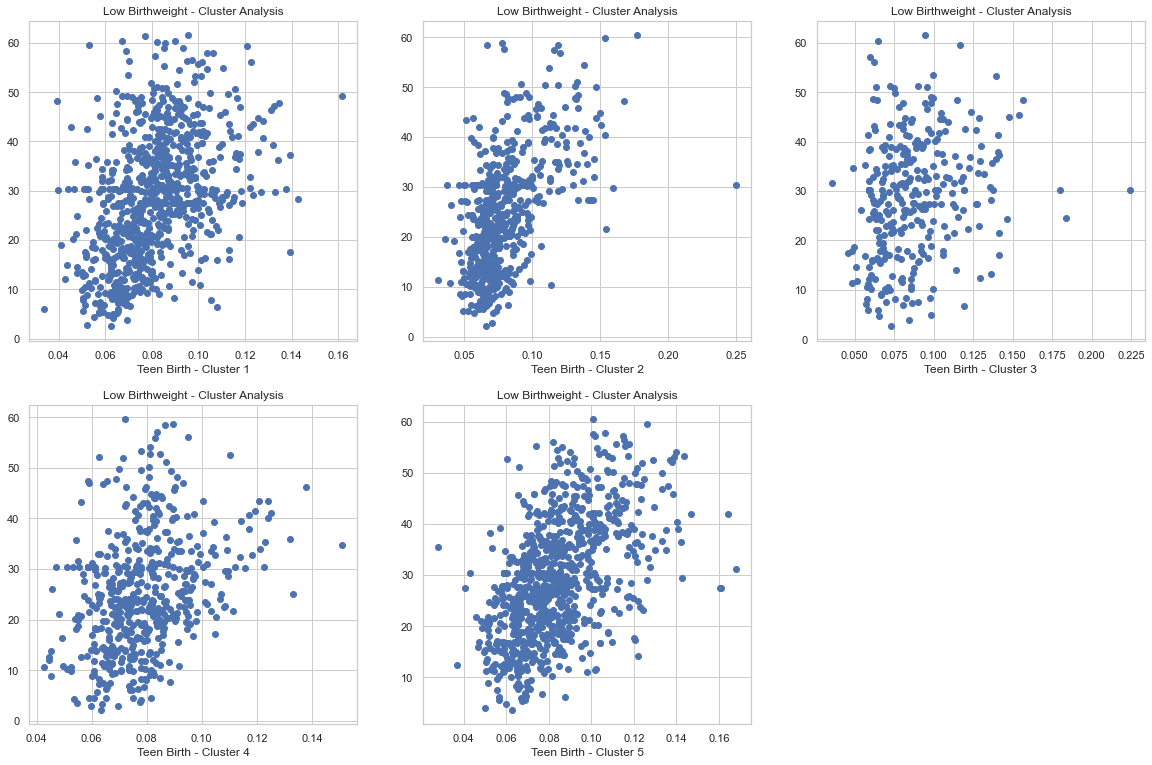

In [23]:
#Plotting the values of low birthweight with Teen births for all the different clusters


plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.scatter(no_scale[y_kmeans==0]['v037_rawvalue'],no_scale[y_kmeans==0]['v014_rawvalue'])
plt.title('Low Birthweight - Cluster Analysis')
plt.xlabel('Teen Birth - Cluster 1')
plt.subplot(3,3,2)
plt.scatter(no_scale[y_kmeans==1]['v037_rawvalue'],no_scale[y_kmeans==1]['v014_rawvalue'])
plt.title('Low Birthweight - Cluster Analysis')
plt.xlabel('Teen Birth - Cluster 2')
plt.subplot(3,3,3)
plt.scatter(no_scale[y_kmeans==2]['v037_rawvalue'],no_scale[y_kmeans==2]['v014_rawvalue'])
plt.title('Low Birthweight - Cluster Analysis')
plt.xlabel('Teen Birth - Cluster 3')
plt.subplot(3,3,4)
plt.scatter(no_scale[y_kmeans==3]['v037_rawvalue'],no_scale[y_kmeans==3]['v014_rawvalue'])
plt.title('Low Birthweight - Cluster Analysis')
plt.xlabel('Teen Birth - Cluster 4')
plt.subplot(3,3,5)
plt.scatter(no_scale[y_kmeans==4]['v037_rawvalue'],no_scale[y_kmeans==4]['v014_rawvalue'])
plt.title('Low Birthweight - Cluster Analysis')
plt.xlabel('Teen Birth - Cluster 5')
plt.show()

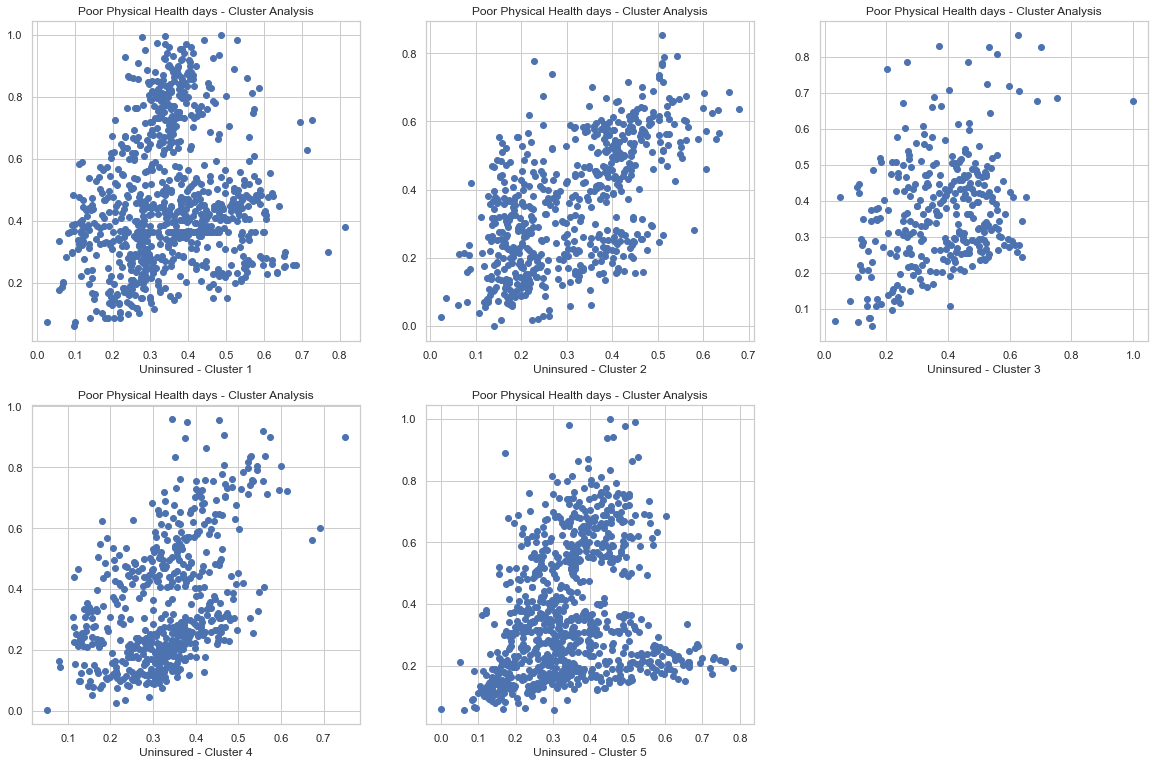

In [24]:
#Plotting the values of poor physical health days with uninsured for all the different clusters


plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.scatter(health_c[y_kmeans==0]['v036_rawvalue'],health_c[y_kmeans==0]['v085_rawvalue'])
plt.title('Poor Physical Health days - Cluster Analysis')
plt.xlabel('Uninsured - Cluster 1')
plt.subplot(3,3,2)
plt.scatter(health_c[y_kmeans==1]['v036_rawvalue'],health_c[y_kmeans==1]['v085_rawvalue'])
plt.title('Poor Physical Health days - Cluster Analysis')
plt.xlabel('Uninsured - Cluster 2')
plt.subplot(3,3,3)
plt.scatter(health_c[y_kmeans==2]['v036_rawvalue'],health_c[y_kmeans==2]['v085_rawvalue'])
plt.title('Poor Physical Health days - Cluster Analysis')
plt.xlabel('Uninsured - Cluster 3')
plt.subplot(3,3,4)
plt.scatter(health_c[y_kmeans==3]['v036_rawvalue'],health_c[y_kmeans==3]['v085_rawvalue'])
plt.title('Poor Physical Health days - Cluster Analysis')
plt.xlabel('Uninsured - Cluster 4')
plt.subplot(3,3,5)
plt.scatter(health_c[y_kmeans==4]['v036_rawvalue'],health_c[y_kmeans==4]['v085_rawvalue'])
plt.title('Poor Physical Health days - Cluster Analysis')
plt.xlabel('Uninsured - Cluster 5')
plt.show()


2) Are there any noteworthy groupings of counties that have similar health outcomes and behaviors? 
You should use an unsupervised learning technique like clustering and show how you decided on the number of clusters. (5 points)


Number of clusters - I used the elbow method to determine the number of clusters. The plot for the elbow curve has been shown above. I used the KMeans model from the sklearn library to plot the elbow curve and determine the number of clusters. As the elbow of the curve is at 5, I decided to build my clustering model on k=5


After plotting scatter plots of a outcome variable with an input feature for all the different clusters, we can see that all the clusters have a rather different distribution, which is indicative of the fact that the clustering has yielded different clusters of counties based on similar health outcomes and behaviors. 

## PREDICTING PREMATURE DEATH - SUPERVISED MODELS

To determine the 5 most important factors predicting premature death, we need to develop two supervised learning models.

As the output variable is premature death, which is a continuous valued variable, I will be using these two models -
(i) Linear Regression
(ii) Decision Trees

<ipython-input-25-95e91ae6a7d5>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1,1)


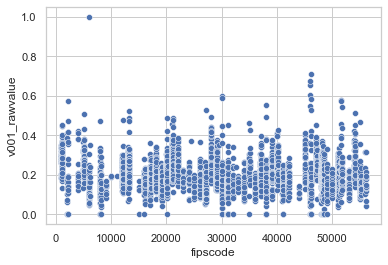

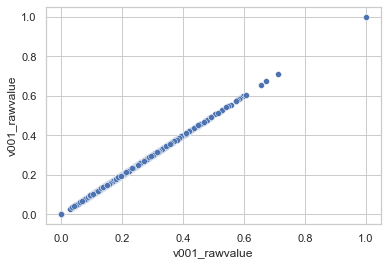

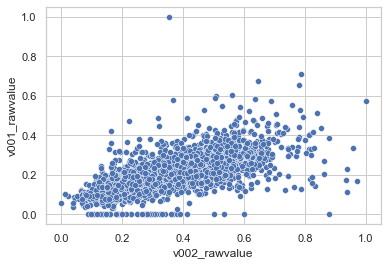

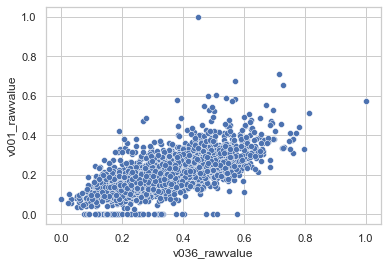

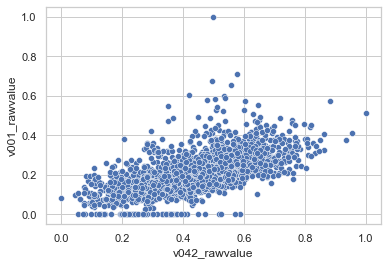

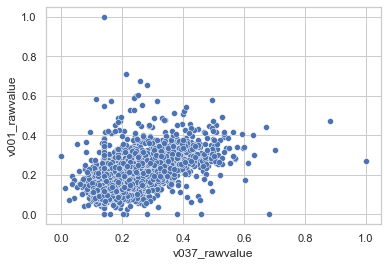

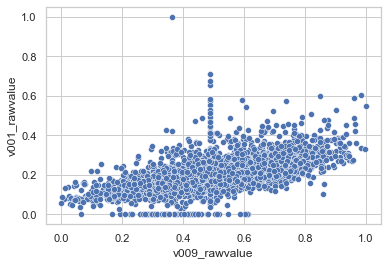

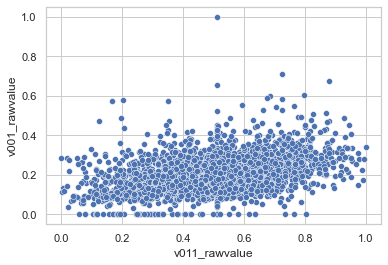

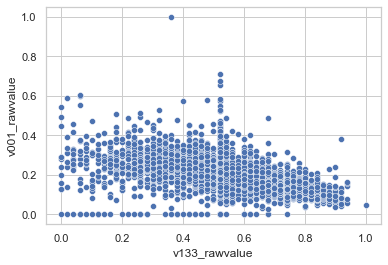

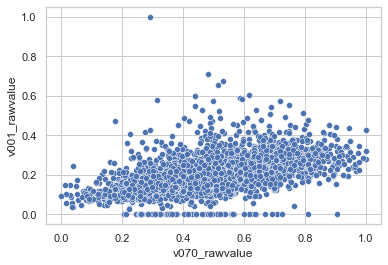

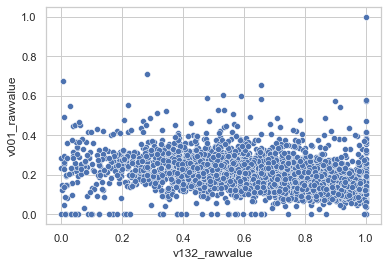

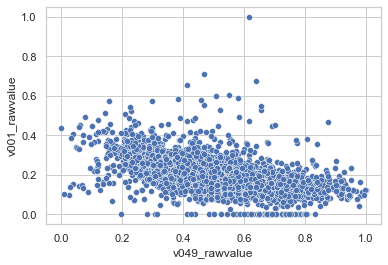

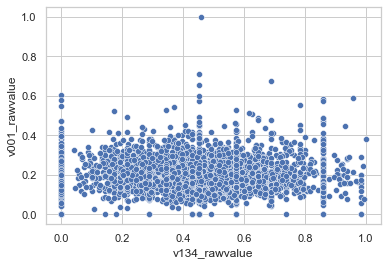

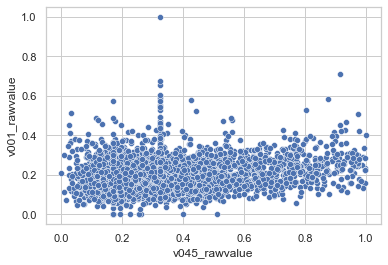

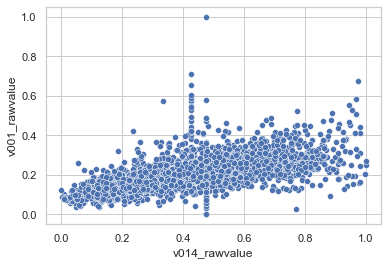

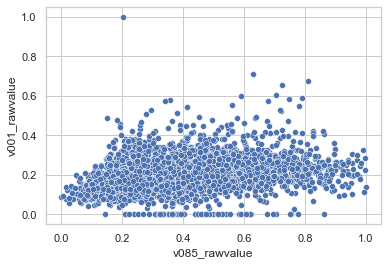

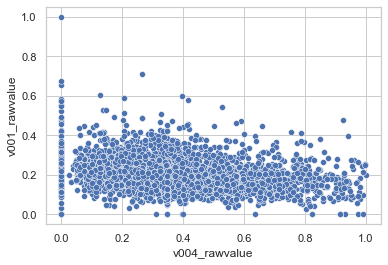

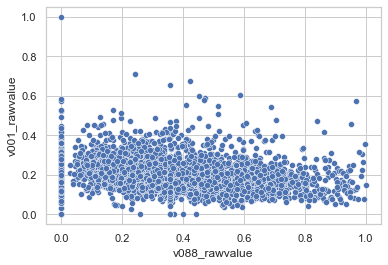

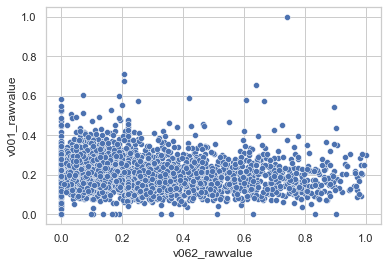

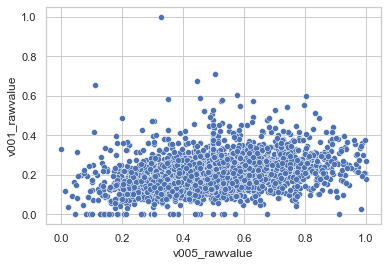

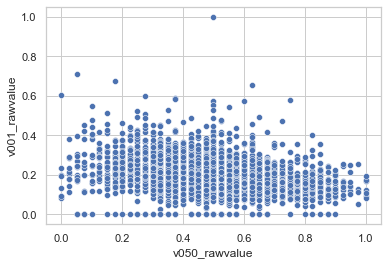

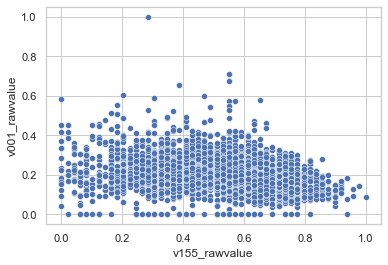

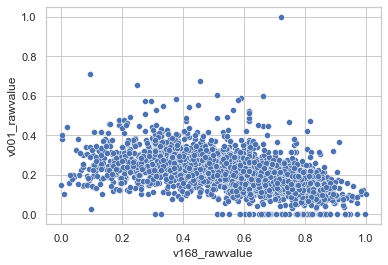

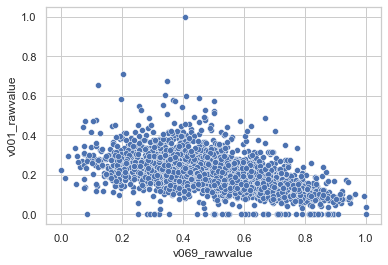

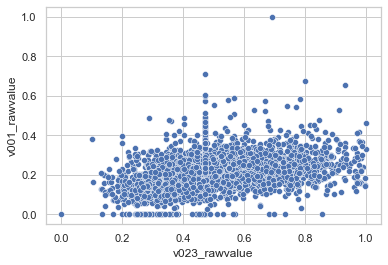

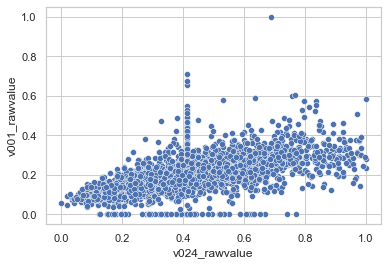

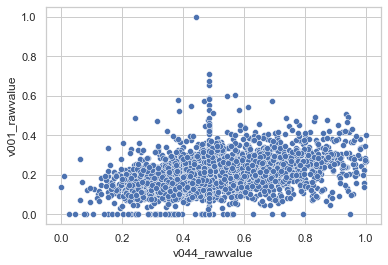

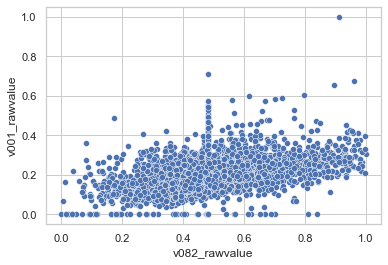

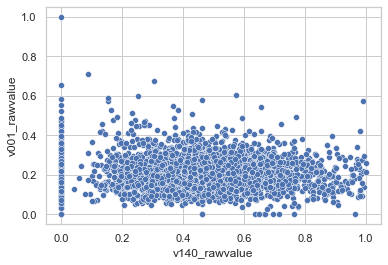

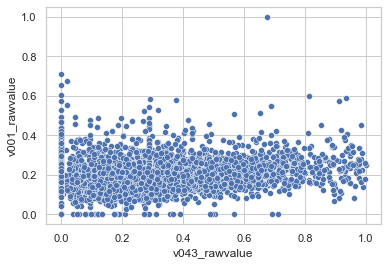

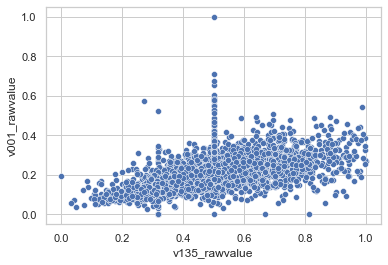

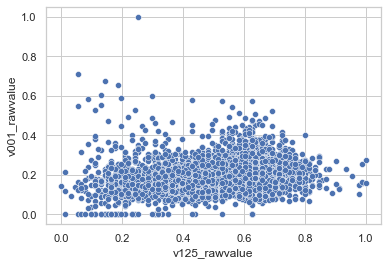

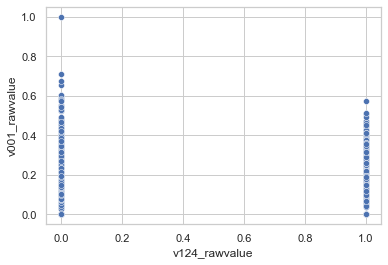

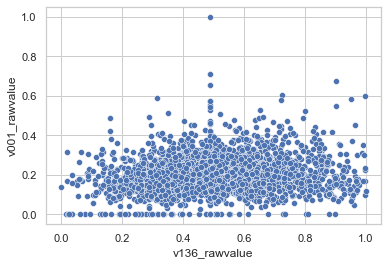

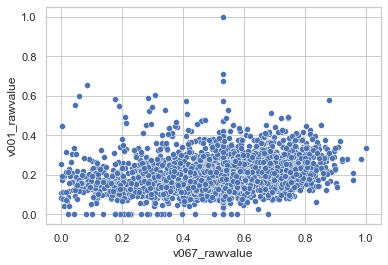

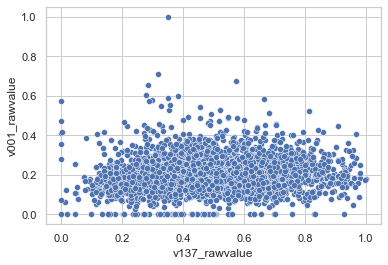

In [25]:
#EDA for Supervised Learning Models

#Plotting a graph of all the features with respect to premature death, so estimate the important factors


for i in health_c.columns:
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1,1)
    ax=sns.scatterplot(data=health_c, x=i, y=health_c.columns[1])    

We can see that there seems to be a linear relationship between Premature death and Adult Smoking, Teen Births, Children in Poverty, Children in single parent household, Injury deaths.

In [26]:
for i in range(len(health_c.columns)):
    my_rho = np.corrcoef(health_c.iloc[:,i], health_c.iloc[:,1])[0,1]
    print(health_c.columns[i],' ',my_rho)


fipscode   -0.05718716038159446
v001_rawvalue   1.0
v002_rawvalue   0.6728502547528147
v036_rawvalue   0.6893877771030703
v042_rawvalue   0.6485541394363336
v037_rawvalue   0.5138741266331333
v009_rawvalue   0.6080921533358872
v011_rawvalue   0.3911629146070027
v133_rawvalue   -0.4669139770083483
v070_rawvalue   0.49603995704071735
v132_rawvalue   -0.2752223814392352
v049_rawvalue   -0.5233693404614336
v134_rawvalue   0.006362439972958318
v045_rawvalue   0.21180623241539148
v014_rawvalue   0.5701126128516265
v085_rawvalue   0.28408848199700437
v004_rawvalue   -0.1757590728472611
v088_rawvalue   -0.16642260658014982
v062_rawvalue   -0.08753464465719157
v005_rawvalue   0.36629887108650605
v050_rawvalue   -0.32644135892004783
v155_rawvalue   -0.24635218609565476
v168_rawvalue   -0.5270389640358137
v069_rawvalue   -0.5302544952261453
v023_rawvalue   0.37862317509399596
v024_rawvalue   0.6104200006005257
v044_rawvalue   0.38017658395815107
v082_rawvalue   0.4597736553503277
v140_rawvalue   

Depending on the initial EDA of scatter plots and the correlation cofficients of the features with premature death, we can exclude a few columns from our future analysis

(i)v140_rawvalue - Social Associations
(ii)v134_rawvalue - Alcohol-impaired driving deaths
(iii)v137_rawvalue - Long Commute (driving alone)
(iv)v124_rawvalue - Drinking Water violations
(v)v062_rawvalue - Mental Health Providers

In [27]:
#Dropping all the columns from the dataframe that have low correlation with our target variable - "premature deaths"

health_c.drop(['v140_rawvalue', 'v134_rawvalue', 'v137_rawvalue', 'v124_rawvalue', 'v062_rawvalue'], axis=1, inplace=True)

In [28]:
#LINEAR REGRESSION

#Splitting the data into train and test data to train the first model and then predict using the trained model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = health_c.iloc[:,6:36].copy()
y = health_c.iloc[:,1].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge(alpha=2.0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#print(X_train.head())

r2_score = r2_score(y_test,y_pred)

print('R2 Score for Decision Tree Regressor:',round(r2_score,2)*100,'%')
print('Mean Squared Error for Decisionn Tree Regressor:', mean_squared_error(y_pred,y_test))
print()

print(model.coef_)


R2 Score for Decision Tree Regressor: 66.0 %
Mean Squared Error for Decisionn Tree Regressor: 0.002345386605512601

[ 0.08822981  0.04805103  0.00729898  0.00048966  0.00499027 -0.06517884
  0.00768535  0.0260414   0.00808623 -0.00759503  0.02261208  0.0235936
 -0.02218399 -0.00691151 -0.0133411  -0.00721529  0.00838136  0.05001339
  0.01383226  0.04796964  0.00949986  0.14705863 -0.00506386  0.01214129
  0.01540132]


LINEAR REGRESSION - Top 5 Factors

To select the features that have the most impact on the premature deaths, we pick the features with the highest coefficients generated from the coefficient matrix of the linear Regression. 

(i) Injury Deaths
(ii) Adult Smoking
(iii) Excessive Drinking
(iv) Children in Single Parent Households
(v) Children in Poverty

Avoiding overfitting - 

The best way to avoid overfitting in this model is by regularizing the model. By doing so, we will no longer be using linear regression, but rather ridge/lasso depending on the type of hyperparameter chosen. 
This dataset, however, performed best at alpha=0.0, which is the hyperparameter for linear regression. 

R2 Score for Decision Tree Regressor: 49.0 %
Mean Squared Error for Decisionn Tree Regressor: 0.003553057828255573

Column:  v009_rawvalue --- Score:  0.027548551595197653
Column:  v011_rawvalue --- Score:  0.013770446517733704
Column:  v133_rawvalue --- Score:  0.009948464502151248
Column:  v070_rawvalue --- Score:  0.015703675848030636
Column:  v132_rawvalue --- Score:  0.023754096157554805
Column:  v049_rawvalue --- Score:  0.07029334912475382
Column:  v045_rawvalue --- Score:  0.014405509013673495
Column:  v014_rawvalue --- Score:  0.03085525420552938
Column:  v085_rawvalue --- Score:  0.0035495613958829624
Column:  v004_rawvalue --- Score:  0.01654951749160183
Column:  v088_rawvalue --- Score:  0.009520786285035549
Column:  v005_rawvalue --- Score:  0.04462742943133342
Column:  v050_rawvalue --- Score:  0.00626813856113355
Column:  v155_rawvalue --- Score:  0.005430498664993071
Column:  v168_rawvalue --- Score:  0.012203967976704389
Column:  v069_rawvalue --- Score:  0.00957148210

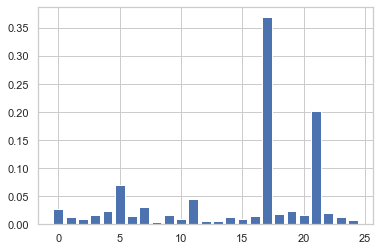

In [29]:
#DECISION TREES

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from sklearn.metrics import r2_score


X = health_c.iloc[:,6:36].copy()
y = health_c.iloc[:,1].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


clf = DecisionTreeRegressor(random_state = 0) 
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

ab= r2_score(y_test,y_pred)

print('R2 Score for Decision Tree Regressor:',round(ab,2)*100,'%')
print('Mean Squared Error for Decisionn Tree Regressor:', mean_squared_error(y_pred,y_test))
print()

export_graphviz(clf, out_file ='tree.dot') 

importance = clf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Column: ',X_train.columns[i]+' --- Score: ',v)

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


DECISION TREE REGRESSOR - Top 5 Factors

To select the features that have the most impact on the premature deaths, we pick the features with the highest importance score from the decision tree model. 


(i) Children in Poverty
(ii) Injury Deaths
(iii) Excessive Drinking
(iv) Teen births
(v) Children in Single Parent Households

In [30]:
#RANDOM FOREST REGRESSOR


from sklearn.ensemble import RandomForestRegressor

X = health_c.iloc[:,6:36].copy()
y = health_c.iloc[:,1].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)

score = clf.score(X_test, y_test)

print('R2 Score for Random Forest Regressor:',round(score,2)*100,'%')
print('Mean Squared Error for Random Forest Regressor Regressor:', mean_squared_error(y_pred,y_test))
print()

R2 Score for Random Forest Regressor: 49.0 %
Mean Squared Error for Random Forest Regressor Regressor: 0.001689640478976738



3) What are the five most important factors predicting premature death as shown by this data?
In this data set, premature death is defined as the number of years of potential life lost before age 75 per 100,000 population. Develop two models (using differentsupervised learning approaches) to answer this question. (5 points)


- For LINEAR REGRESSION (Supervised Learning Model 1)
(i) After running the linear regression model, we can see that the top 5 factors affecting premature deaths are Injury Deaths, Adult Smoking, Excessive Drinking, Children in Single Parent Households and Children in Poverty
(ii) The RMS for this model is 0.002
(iii) The R2 score for this model is 66%


- For DECISION TREE REGRESSOR (Supervised Learning Model 2)
(i) After running the Decision Tree Classifier model, we can see that the top 5 factors affecting premature deaths are Children in Poverty, Injury Deaths, Excessive Drinking, Teen Births and Children in Single Parent Households.
(ii) The RMS for this model is 0.004
(iii) The R2 score for this model is 49%

After evaluating both the models and the EDA for all the features with premature deaths, we can say that the five most important factors predicting premature deaths is 
(i)Injury Deaths
(ii)Excessive Drinking
(iii)Children in single parent household
(iv) Children in Poverty
(v)Adult Smoking


## REDUCE PREMATURE DEATHS - ALLEGHENY COUNTY

4) Which of the two models do you believe is more accurate and how can you tell? Where would you focus public health efforts to reduce premature deaths in Allegheny County?
(5 points)

(i) Accuracy - For both the supervised learning models, we test the accuracy by two factors - R2 score and the Root Mean squared error
For the Linear Regression Model - R2=66% and RMS=0.002
For the Decision Tree Regressor Model - R2=49% and RMS=0.04
By comparing both the parameters for accuracy with both the models, we can see that the Linear Regression Model has performed better in this dataset than the Decision Tree Regressor Model. 


(ii) For Allegheny County - 
According to our supervised learning models, we can see that the top 5 features that affect premature deaths are Injury Deaths, Excessive Drinking, Adult Smoking, Children in single parent household and Children in poverty.
To reduce premature deaths in Allegheny county, public heath efforts should be made in 
- Implementing policies that impose stricter laws when it comes to consuming alcohol and tobacco products. 
- Laws about children health should also be taken seriously. 
- Checks should be made to keep a tab on Children in single parent household
- Quick first-aid and primary care to reduce injury deaths
